# Thématique : la Colonisation

## Nous avons télécharger sur CAMille-ULB les journaux du journal "Le soir" avec la requête ("La Colonisation"~4)

## Tous outils à importer

In [29]:
import os
import PyPDF2


# d'autres importation

from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# Le reste des imports

import yake
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
%pip install  fr_core_news_md




[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


## Vérifions  d'abord si tous nos fichiers sont en extension TXT

In [15]:

txt_path = '../data/txt'

txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
len(txts)

983

In [16]:
#  Lister les fichiers pdf qui n'ont pas encore été convertis en txt
not_converted_pdfs = []
for pdf in txts:
    file_name = os.path.splitext(pdf)[0]
    if file_name.endswith(".pdf") :
        not_converted_pdfs.append(pdf)
len(not_converted_pdfs)
print(not_converted_pdfs)

[]


In [17]:
!cat ../data/txt/*.txt > ../data/Tout.txt

In [18]:
with open("../data/Tout.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [19]:
!wc ../data/Tout.txt


       0  6173320 37339845 ../data/Tout.txt


# Analalyse de la distribution du vocabulaire

## Créer une une liste de stopwords

In [20]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

In [21]:
# Récupération du contenu du fichier
path = "../data/Tout.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]


# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9125359 words found


## Calculer la taille du vocabulaire

In [22]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")


2818808 words kept (364382 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

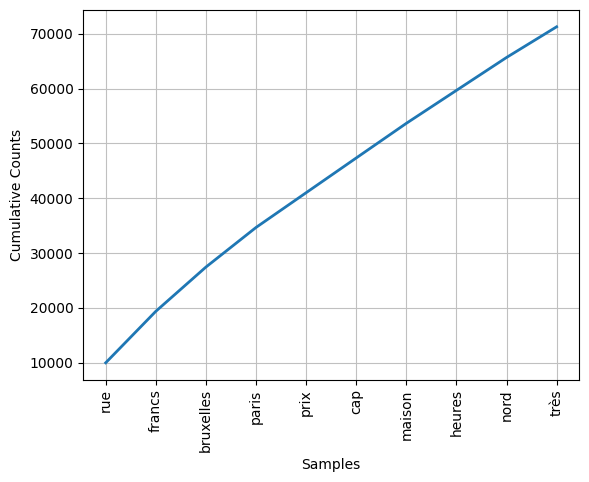

In [23]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [24]:
fdist.hapaxes()[:30]

['sarblc',
 'brùxellt',
 'parisiels',
 'iflfr',
 'lukubdubfilsr',
 'efuigeb',
 'lirmtionaii',
 'oiiln',
 'rvîî',
 'tfllltifws',
 'cossebvahok',
 'peogeîs',
 'soot',
 'fagencre',
 'ditœar',
 'rokirn',
 'mnuui',
 'baasenstciu',
 'tjjnew',
 'rros',
 'attribuéèparles',
 'oootipeht',
 'sétbie',
 'tribués',
 'confir',
 'agipil',
 'drfs',
 'élaboratioh',
 'suscita',
 'erenthal']

## Trouver les mots les plus longs du corpus

In [25]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiijiiiiiiiiiiiiiiiiiiiiitiiiiiiiiuiiiiiiiiiiitiiiiiiuiiiiiiiiiiiiiiiii',
 'iiinniiiiiiiniiimiiiiniiiniiiiiniiiiiiiiiiiiiiiiiiiiiiiiimi',
 'aaaaaaaaaaaaaaaaaaaaaaaaawaaaawaaaaaaaaaaaaaaaaaaaaaaaaaà',
 'regonstitufintàbasedsvingênéreuxrtdbquinqdis',
 'aamaaaaiauaaaaaaaaaaaaaaaajaaaaaaaaaaaabaaaa',
 'reconstituantàbaseiievlngenereuxetdequinquin',
 'reconstituantàbaselevingenereuxetdaquinquin',
 'recqnstituantàbasedevingënereuxetdequinquin',
 'reconstituantàbasedevingenereuxetdequinquin',
 'reconstituantàbasedevingénereuxetdequinquin',
 'reconstituantèbasedevingenereuxetdequinquin',
 'reconstituântàbasedevingénereuxetnequinquin',
 'recqnstituantâbasedeyinqênëreuxetdequinquin',
 'beconstituantàbasejevingénereuxetdequinquin',
 'reconstituantàbasedevingênëreuxetdequinquin',
 'reconstituântàbâsedavikqënereuxetdequsnquin',
 'reconstituantàbasedevingénereuxetdequinpin',
 'laplusimpwtanlomalsoiitlrroslerstluhoiiùe',
 'iisivenamimportebiffsnmnjwutellbdonffliw',
 'uplûsiniportantemaiflonua

## Extraction des mots clés avec Yake

In [30]:

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor


for f in sorted(txts)[:10]:
    text = open(os.path.join(txt_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB555_1913-01-01_01-00005.txt mentions these keywords: d'une valeur, crédit mutuel, Marché calme, Indépendance belge, Caisse centrale, Autriche Rente, petit producteur, Autriche Crédit, Schulze Delitzseh...
KB_JB555_1913-01-02_01-00002.txt mentions these keywords: VON KIDERLEN-WAECHTER, von Kiderlen, von Schoen, nouveau cabinet, von Holstein, Roi qu'il, oomte Romanonès, von Bethmann-Hollweg...
KB_JB555_1913-01-05_01-00005.txt mentions these keywords: Bourse fermée, Marché calme, LONDRES Comptant, Marché ferme, cours jours, Indépendance neige, Autriche Rente...
KB_JB555_1913-01-05_01-00006.txt mentions these keywords: BELLE MAISON, avenue Louise, vendre belle, notaires Van, francs l'an...
KB_JB555_1913-01-06_01-00006.txt mentions these keywords: Fin déc, déc Fin, Crédit Anversois, Pin déc, Rente belge, capital Fin, Bruxelles Banque...
KB_JB555_1913-01-07_01-00001.txt mentions these keywords: IstO Genxiiaesl, ministres turc, congrégations religieuses, grandes puissances, plénipotentia

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [31]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

983

In [44]:
year = 1913


# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))


# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"I* £N BELGIQUE ET A PARIS 84- ANNEE Vendredi 26 septembre 1M3 ADMINISTRATION ET RÉDACTION 1 ï» ruo «I«mi Sarblc»»» Brùxellt-s*» BUREAUX PARISIElS : 11, place de la Bourse ABONNEMENTS: '■■ ÉDITION QUOTIDIENNE BELGIQUE. Ub », 20 fr. E mois. Iflfr. 3 mois, 5 fr. LUKUBDUBfilSr.-DJ 28 îr » 15 fr. » 8 fr. EfUIGEB > 40 fr. 22 fr. » 12 ir. ÉDITION HEBDOMADAIRE 'It-lirmtionaii et d'Oiiln-merl 10 PAGES, PARAISSANT LE MERCREDI Un tan ,... v rVîî fran<» Six mol» ii; franc-» K» nom Vendredi 26 septembre 1913"

## La fonction de nettoyage

In [45]:

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur notre fichier coloni

In [46]:
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'BELGIQUE PARIS ANNEE VENDREDI SEPTEMBRE ADMINISTRATION RÉDACTION RUO SARBLC BRÙXELLT BUREAUX PARISIELS PLACE BOURSE ABONNEMENTS ÉDITION QUOTIDIENNE BELGIQUE MOIS IFLFR MOIS LUKUBDUBFILSR EFUIGEB ÉDITION HEBDOMADAIRE LIRMTIONAII OIILN MERL PAGES PARAISSANT MERCREDI TAN RVÎÎ FRAN SIX MOL FRANC NOM VENDREDI SEPTEMBRE MOIS TFLLLTIFWS EAS JOEB COSSEBVAHOK SAS PEOGEÎS ÉDITION SOIR ANNONCES REÇUES BRUXELLES BUREAU JOU ANL PARIS PLACE BOURSE NUB CHEI MIL JOHN JONES SOOT BILL FAGENCRE HARAS CHEAP IDE OBÉ'

### Afficher les termes les plus fréquents après nettoyage


In [47]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 9975), ('FRANCS', 9390), ('BRUXELLES', 8070), ('PARIS', 7226), ('PRIX', 6338), ('CAP', 6337), ('MAISON', 6319), ('HEURES', 6010), ('NORD', 6003), ('TRÈS', 5599)]


### Créer, stocker et afficher le nuage de mots

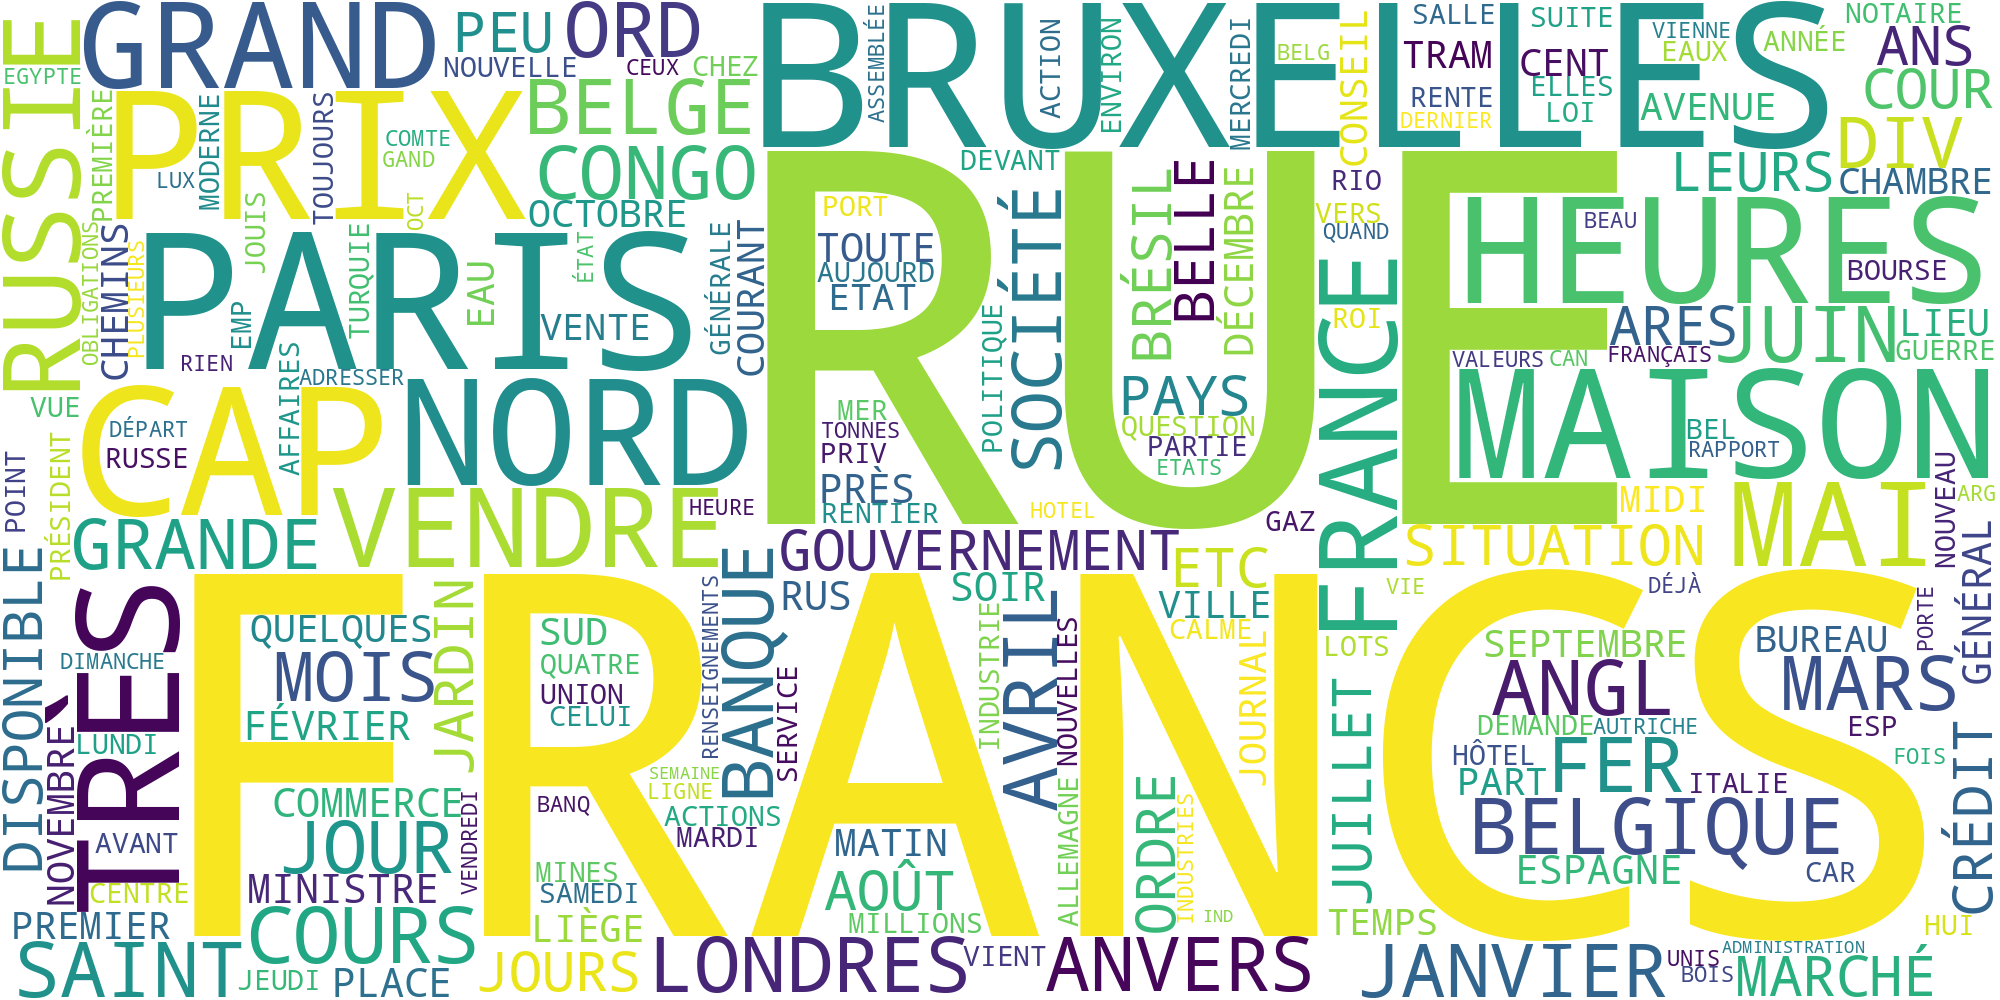

In [48]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))